In [45]:
import glob
import F21DataLoader as dl
import f21_predict_base as base
import F21Stats as f21stats

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization

import logging

import importlib

importlib.reload(dl)
importlib.reload(base)
importlib.reload(f21stats)

logger = logging.getLogger(__name__)

def load_dataset(datafiles, psbatchsize=100, ps_bins=None, limitsamplesize=None):
    # Create processor with desired number of worker threads
    processor = dl.F21DataLoader(max_workers=1, psbatchsize=psbatchsize, skip_ps=False, ps_bins=None, limitsamplesize=limitsamplesize, scale_ps=True)#, limitsamplesize=4)
        
    # Process all files and get results 
    results = processor.process_all_files(datafiles)
        
    # Access results
    #print(f'{results.keys()}')
    all_ks = results['ks']
    all_los = results['los']
    all_freq = results['freq_axis']
    all_ps = results['ps']
    #ps_std = results['ps_std']
    #ps_plus_std = all_ps + ps_std
    #ps_minus_std = all_ps - ps_std
    all_params = results['params']
    #plot_los(all_ps[0], freq_axis)
    """
    print(f"sample ks:{all_ks[0]}")
    print(f"sample ps:{all_ps[0,:]}")
    print(f"sample params:{all_params[0]}")
    print(f"sample los:{all_los[0]}")
    print(f"sample freq:{all_freq}")
    """
    #base.plot_los(all_los[:1], all_freq[0,:], showplots=True, saveplots = False, label=f"{all_params[0]}")
    #base.plot_power_spectra(all_ps[:1], all_ks[:1], all_params[:1], showplots=True, saveplots = False, label=f"{all_params[0]}")

    print(f"load_data_set: data shape: {all_los.shape}")
    print(f"load_data_set: parameters shape: {all_params.shape}")
    return (all_params, all_freq, all_los, all_ps, all_ks)


load_data_set: data shape: (1, 2762)
load_data_set: parameters shape: (1, 2)
k:[0.00000000e+00 2.84444178e-07 5.68888357e-07 ... 3.92248522e-04
 3.92532966e-04 3.92817410e-04]
x:[0.00000000e+00 3.16448869e-08 6.36783090e-08 ... 4.50273812e-05
 4.25724612e-05 4.66542982e-05]
load_data_set: data shape: (21, 2762)
load_data_set: parameters shape: (21, 2)
k:[0.00000000e+00 2.84444178e-07 5.68888357e-07 ... 3.92248522e-04
 3.92532966e-04 3.92817410e-04]
x:[0.00000000e+00 3.88272950e-08 7.42475889e-08 ... 4.36991136e-05
 4.59668690e-05 4.59411163e-05]
k:[0.00000000e+00 2.84444178e-07 5.68888357e-07 ... 3.92248522e-04
 3.92532966e-04 3.92817410e-04]
x:[0.00000000e+00 3.82914973e-08 6.86261041e-08 ... 4.43003667e-05
 4.24509676e-05 4.83603208e-05]
k:[0.00000000e+00 2.84444178e-07 5.68888357e-07 ... 3.92248522e-04
 3.92532966e-04 3.92817410e-04]
x:[0.00000000e+00 3.31608614e-08 6.67582044e-08 ... 4.44946072e-05
 4.50375296e-05 4.30248171e-05]
k:[0.00000000e+00 2.84444178e-07 5.68888357e-07 ... 

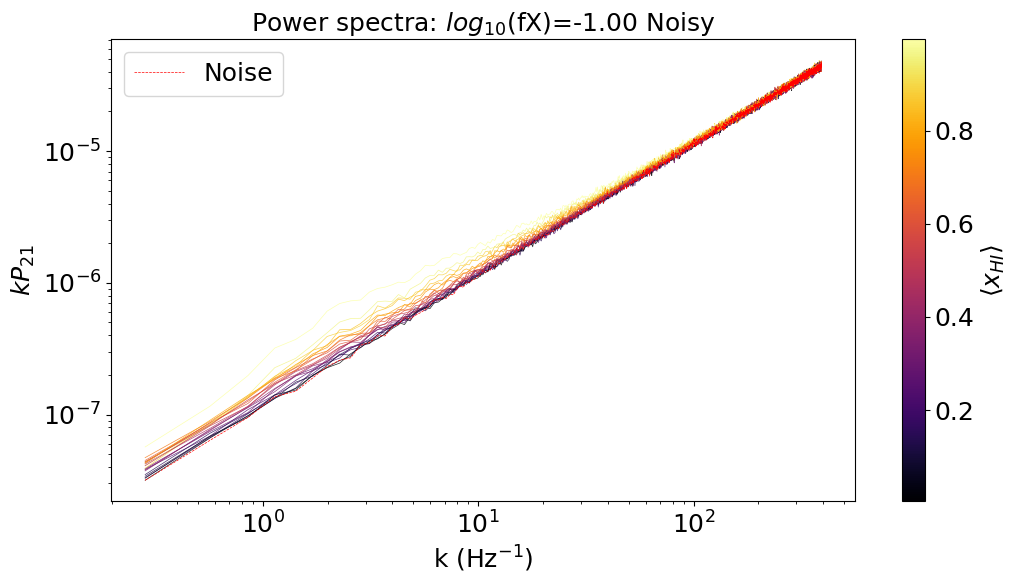

<Figure size 1200x600 with 0 Axes>

In [46]:
(paramsn1000, freqn1000, losn1000, psn1000, ksn1000) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noiseonly_21cmFAST_200Mpc_z6.0_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=1000, limitsamplesize=1000)
ksn1000_logbin, psn1000_logbin = f21stats.logbin_power_spectrum_by_k(ksn1000, psn1000)
ksn1000_linbin, psn1000_linbin = f21stats.linbin_ps(ksn1000, psn1000, 20, 100)

files10sn=glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI*_uGMRT_8kHz_t500h*.dat")
param10sn1000, freq10sn1000, los10sn1000, ps10sn1000, ks10sn1000 = load_dataset(files10sn, psbatchsize=1000, limitsamplesize=1000, ps_bins=None)
ks10sn1000_logbin, ps10sn1000_logbin = f21stats.logbin_power_spectrum_by_k(ks10sn1000, ps10sn1000)
ks10sn1000_linbin, ps10sn1000_linbin = f21stats.linbin_ps(ks10sn1000, ps10sn1000, 20, 100)
base.plot_power_spectra(ps10sn1000, ks10sn1000, param10sn1000, psn=psn1000[0], colorind=0, showplots=True, saveplots=False, label=r"$log_{10}$(fX)=-1.00 Noisy")


min-max range: 0.004162702709436417-0.9957664012908936


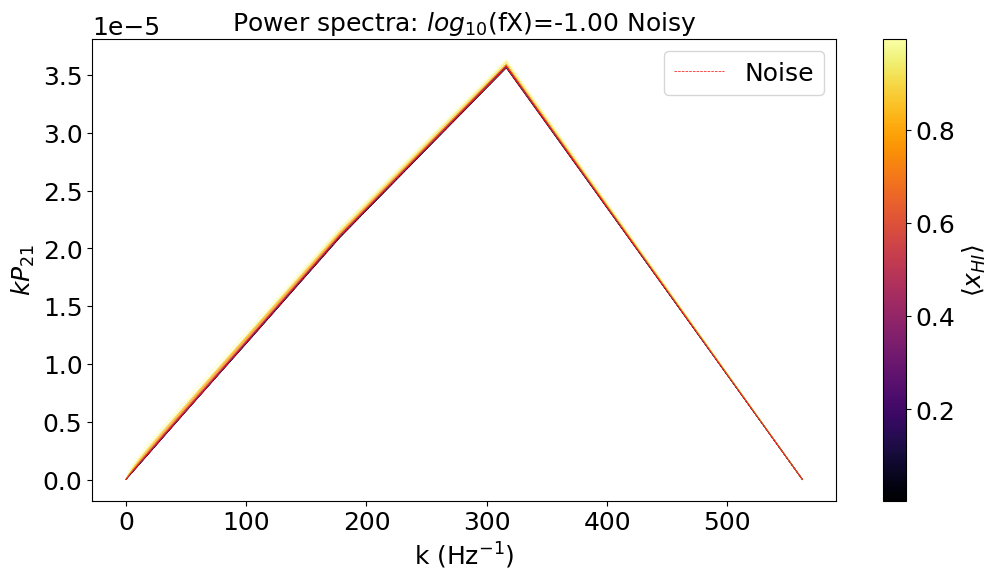

min-max range: 0.004162702709436417-0.9957664012908936


<Figure size 1200x600 with 0 Axes>

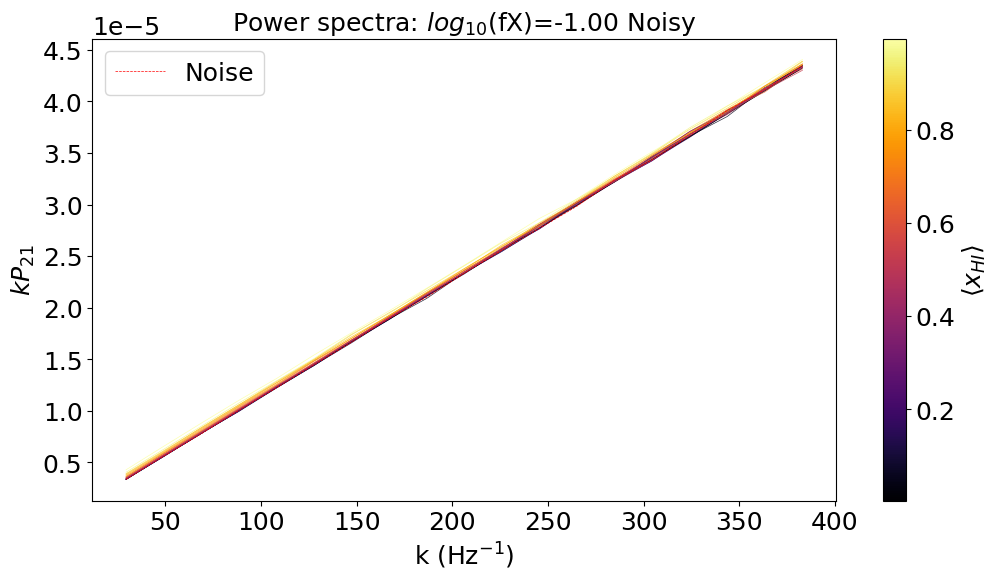

<Figure size 1200x600 with 0 Axes>

In [47]:
base.plot_power_spectra(ps10sn1000_logbin, ks10sn1000_logbin, param10sn1000, psn=psn1000_logbin[0], colorind=0, showplots=True, saveplots=False, label=r"$log_{10}$(fX)=-1.00 Noisy", scale='linear', markers=True)
base.plot_power_spectra(ps10sn1000_linbin, ks10sn1000_linbin, param10sn1000, psn=psn1000_linbin[0], colorind=0, showplots=True, saveplots=False, label=r"$log_{10}$(fX)=-1.00 Noisy", scale='linear', markers=True)


load_data_set: data shape: (1000, 2762)
load_data_set: parameters shape: (1000, 2)
Shape of transformed data: (1382, 1382)
min-max range: 0.004162702709436417-0.9957664012908936


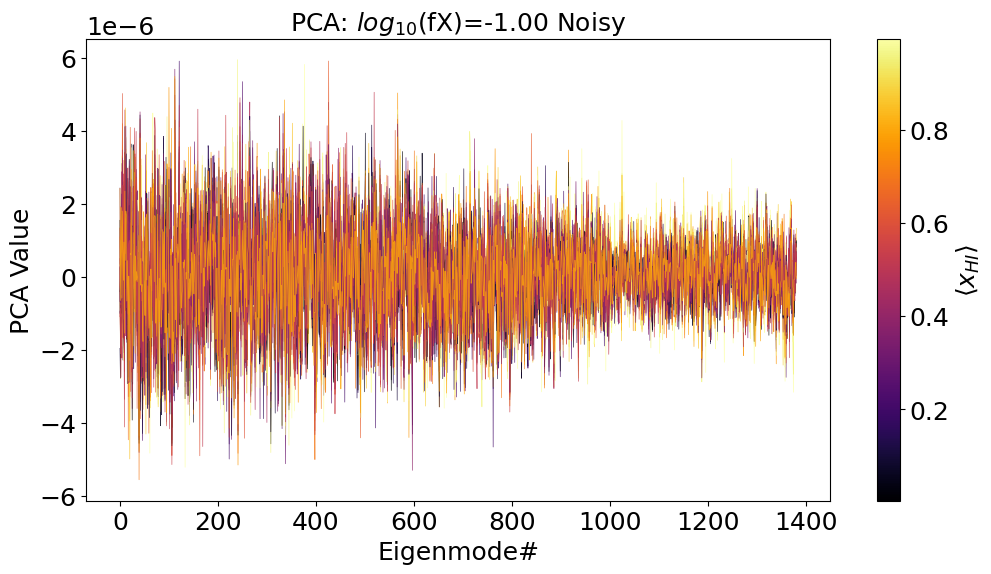

<Figure size 1200x600 with 0 Axes>

In [11]:
from sklearn.decomposition import PCA

#files10sn=glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI*_uGMRT_8kHz_t500h*.dat")
#param10sn, freq10sn, los10sn, ps10sn, ks10sn = load_dataset(files10sn, psbatchsize=10, limitsamplesize=1000, ps_bins=None)
(paramsn, freqn, losn, psn, ksn) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noiseonly_21cmFAST_200Mpc_z6.0_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=1, limitsamplesize=1000)
psn = f21stats.bootstrap(psn)

num_components = min(psn.shape[0], psn.shape[1])
model = PCA(n_components=num_components)
txn = model.fit_transform(psn)
print(f"Shape of transformed data: {txn.shape}")


load_data_set: data shape: (21, 2762)
load_data_set: parameters shape: (21, 2)
min-max range: 0.0043569291010499-0.9997802972793579


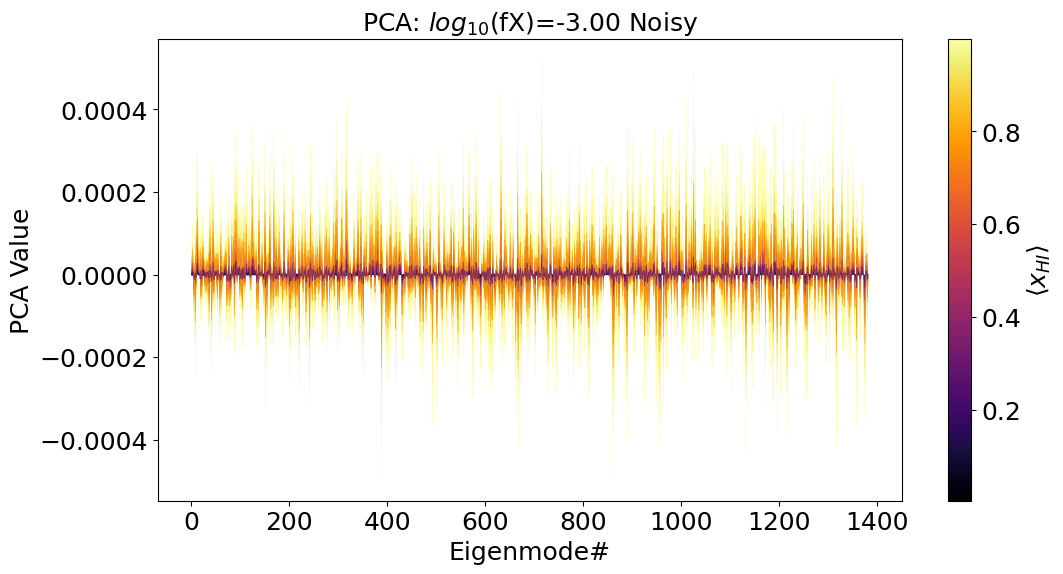

<Figure size 1200x600 with 0 Axes>

In [12]:
files30sn=glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-3.00_xHI*_uGMRT_8kHz_t500h*.dat")
param30sn1000, freq30sn1000, los30sn1000, ps30sn1000, ks30sn1000 = load_dataset(files30sn, psbatchsize=1000, limitsamplesize=1000, ps_bins=None)

tx30sn1000 = model.transform(ps30sn1000)
base.plot_pca(tx30sn1000, param30sn1000, colorind=0, showplots=True, saveplots=False, label=r"$log_{10}$(fX)=-3.00 Noisy")


min-max range: 0.004162702709436417-0.9957664012908936


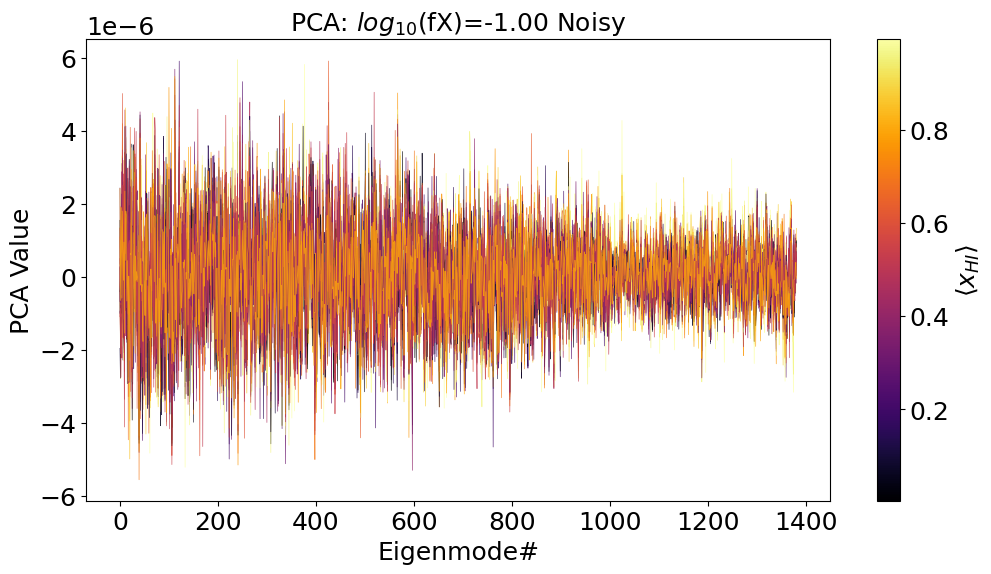

<Figure size 1200x600 with 0 Axes>

In [13]:

tx10sn1000 = model.transform(ps10sn1000)
base.plot_pca(tx10sn1000, param10sn1000, colorind=0, showplots=True, saveplots=False, label=r"$log_{10}$(fX)=-1.00 Noisy")


In [25]:
from sklearn.decomposition import PCA

#files10sn=glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI*_uGMRT_8kHz_t500h*.dat")
#param10sn, freq10sn, los10sn, ps10sn, ks10sn = load_dataset(files10sn, psbatchsize=10, limitsamplesize=1000, ps_bins=None)
(paramssomax, freqsomax, lossomax, pssomax, kssomax) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-4.00_xHI0.94_8kHz.dat"], psbatchsize=1, limitsamplesize=1000)
pssomax = np.log(np.clip(pssomax, 1e-20, None))
pssomax = f21stats.bootstrap(pssomax)

num_components = min(pssomax.shape[0], pssomax.shape[1])
somodel = PCA(n_components=num_components)
txsomax = somodel.fit_transform(pssomax)
print(f"Shape of transformed data: {txsomax.shape}")


load_data_set: data shape: (1000, 2762)
load_data_set: parameters shape: (1000, 2)
Shape of transformed data: (1382, 1382)


min-max range: 0.004162702709436417-0.9957664012908936


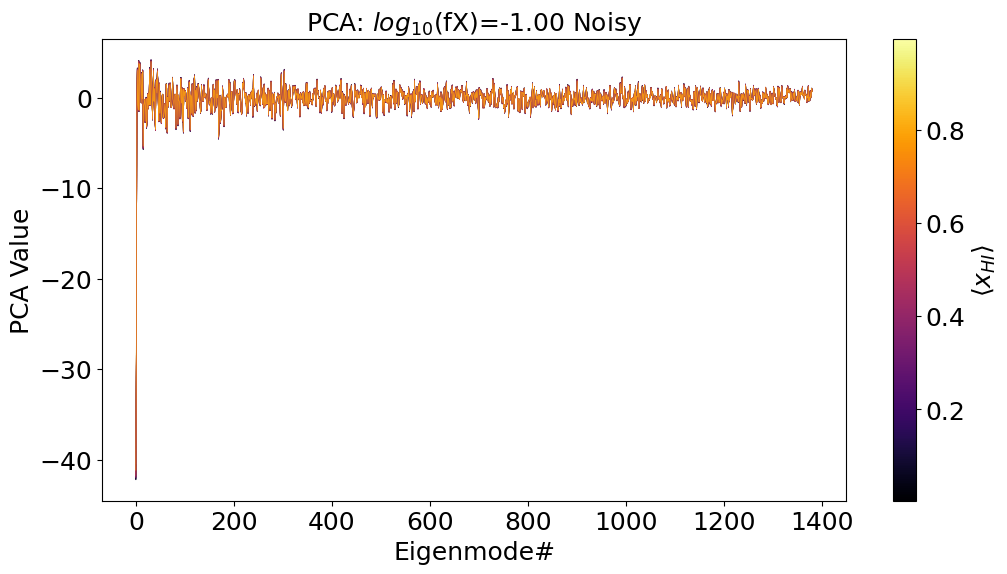

<Figure size 1200x600 with 0 Axes>

In [26]:

tx10sn1000 = somodel.transform(np.log(np.clip(ps10sn1000, 1e-20, None)))
base.plot_pca(tx10sn1000, param10sn1000, colorind=0, showplots=True, saveplots=False, label=r"$log_{10}$(fX)=-1.00 Noisy")
